## 1. Import libraries

In [67]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

['.DS_Store', 'heart.csv', 'README.md', 'heart+disease 3', 'heart_dis_pred.ipynb', 'heart.dat.txt']


In [68]:
import os
print(os.listdir())

['.DS_Store', 'heart.csv', 'README.md', 'heart+disease 3', 'heart_dis_pred.ipynb', 'heart.dat.txt']


In [69]:

import warnings
warnings.filterwarnings('ignore')

## 2. Importing dataset 

In [70]:
#define coloumn names
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_dat_df = pd.read_csv('heart.dat.txt', delim_whitespace=True, header=None, names=column_names)
heart_dat_df['target'] = heart_dat_df['target'].replace({1: 0, 2: 1})

In [71]:
# Load heart.csv
heart_csv_df = pd.read_csv('heart.csv')

In [72]:
print(heart_dat_df.columns)
print(heart_csv_df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [73]:
print(heart_dat_df.head())
print(heart_csv_df.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  70.0  1.0  4.0     130.0  322.0  0.0      2.0    109.0    0.0      2.4   
1  67.0  0.0  3.0     115.0  564.0  0.0      2.0    160.0    0.0      1.6   
2  57.0  1.0  2.0     124.0  261.0  0.0      0.0    141.0    0.0      0.3   
3  64.0  1.0  4.0     128.0  263.0  0.0      0.0    105.0    1.0      0.2   
4  74.0  0.0  2.0     120.0  269.0  0.0      2.0    121.0    1.0      0.2   

   slope   ca  thal  target  
0    2.0  3.0   3.0       1  
1    2.0  0.0   7.0       0  
2    1.0  0.0   7.0       1  
3    2.0  1.0   7.0       0  
4    1.0  1.0   3.0       0  
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236  

In [74]:
# Convert all columns to float except the 'target' column
for col in heart_dat_df.columns:
    if col != 'target':
        heart_dat_df[col] = heart_dat_df[col].astype(int)

# Convert 'target' column to integer
heart_csv_df['target'] = heart_csv_df['target'].astype(int)

In [75]:
print(heart_dat_df.head())
print(heart_csv_df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   70    1   4       130   322    0        2      109      0        2      2   
1   67    0   3       115   564    0        2      160      0        1      2   
2   57    1   2       124   261    0        0      141      0        0      1   
3   64    1   4       128   263    0        0      105      1        0      2   
4   74    0   2       120   269    0        2      121      1        0      1   

   ca  thal  target  
0   3     3       1  
1   0     7       0  
2   0     7       1  
3   1     7       0  
4   1     3       0  
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178   

In [76]:
merged_df = pd.concat([heart_dat_df, heart_csv_df], ignore_index=True)

In [77]:
print(merged_df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   70    1   4       130   322    0        2      109      0      2.0      2   
1   67    0   3       115   564    0        2      160      0      1.0      2   
2   57    1   2       124   261    0        0      141      0      0.0      1   
3   64    1   4       128   263    0        0      105      1      0.0      2   
4   74    0   2       120   269    0        2      121      1      0.0      1   

   ca  thal  target  
0   3     3       1  
1   0     7       0  
2   0     7       1  
3   1     7       0  
4   1     3       0  


In [78]:
row_count1 = len(heart_csv_df)
print(f'The DataFrame has {row_count1} rows.')

row_count2 = len(heart_dat_df)
print(f'The DataFrame has {row_count2} rows.')

row_count = len(merged_df)
print(f'The Merged DataFrame has {row_count} rows.')

The DataFrame has 303 rows.
The DataFrame has 270 rows.
The Merged DataFrame has 573 rows.


In [79]:
missing_values = merged_df.isnull().sum()
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## Exploratory Data Analysis (EDA)

 ### Analysing the target variable:

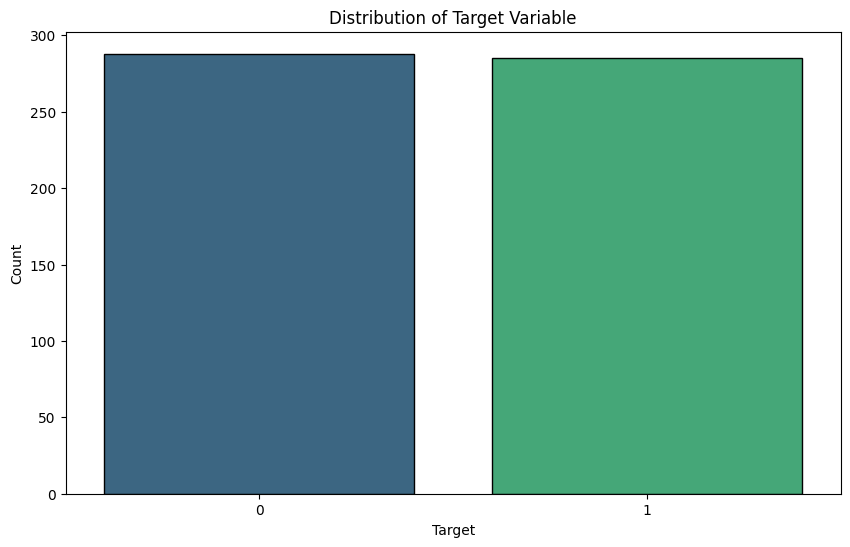

target
0    288
1    285
Name: count, dtype: int64


In [80]:
# Extract target variable
y = merged_df["target"]

# Plot the count of target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=y, palette='viridis', edgecolor='black')

# Display the plot
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

# Print target value counts
target_temp = merged_df['target'].value_counts()
print(target_temp)

In [81]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/573,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/573,2)))

Percentage of patience without heart problems: 50.26
Percentage of patience with heart problems: 49.74


## Comparing each feature component with its likelihood of heart disease occurrence.


### Analysing the 'Sex' feature

In [82]:
merged_df["sex"].unique()

array([1, 0])

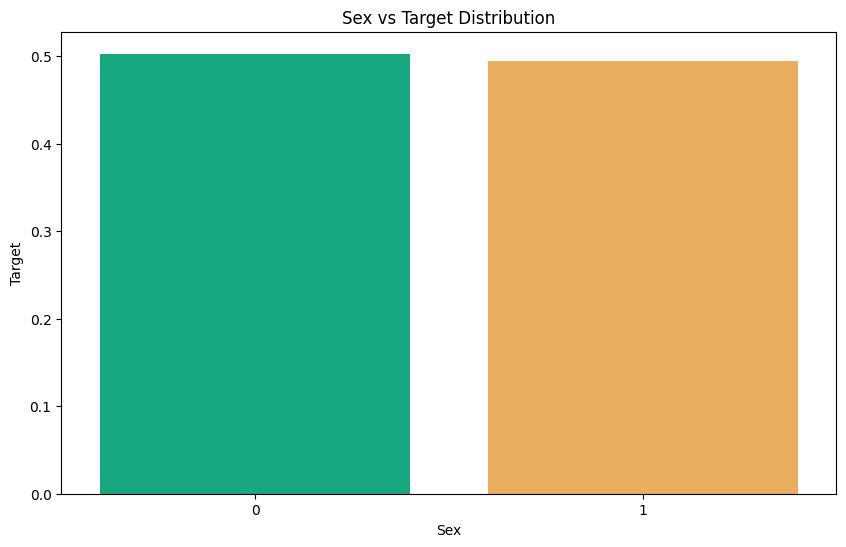

In [83]:
plt.figure(figsize=(10, 6))

# Barplot with color palette
sns.barplot(x="sex", y="target", data=merged_df, palette=["#00C08B", "#FFB347"], ci=None)

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Target')
plt.title('Sex vs Target Distribution')
plt.show()


In [84]:
# Calculate the percentage of individuals with heart disease by sex
heart_disease_percent = merged_df.groupby('sex')['target'].mean() * 100

# Display the result as percentages
heart_disease_percent = heart_disease_percent.rename({0: 'Female', 1: 'Male'})
print("Percentage of individuals with heart disease by sex:")
print(heart_disease_percent)


Percentage of individuals with heart disease by sex:
sex
Female    50.273224
Male      49.487179
Name: target, dtype: float64


### Analysing the 'Chest Pain Type' feature

In [85]:
merged_df["cp"].unique()

array([4, 3, 2, 1, 0])

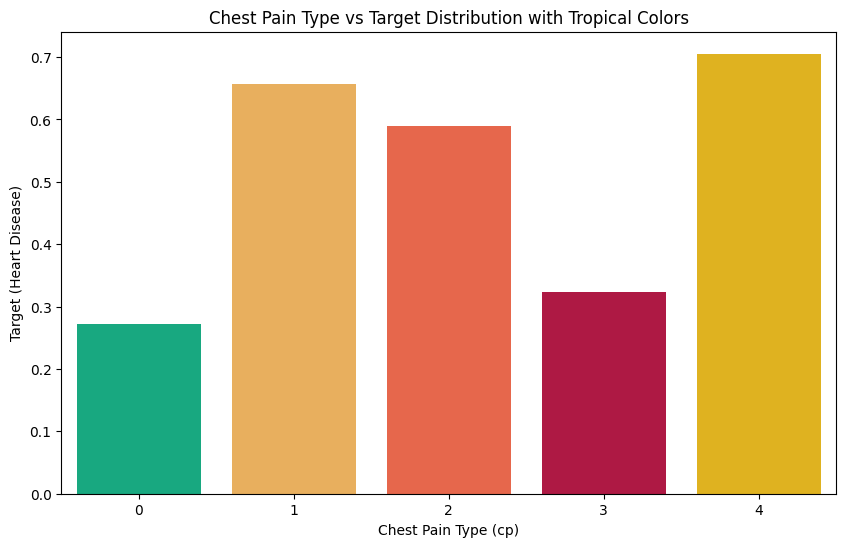

In [86]:
plt.figure(figsize=(10, 6))

# Barplot with the tropical color palette
sns.barplot(x="cp", y="target", data=merged_df, palette=["#00C08B", "#FFB347", "#FF5733", "#C70039", "#FFC300"], ci=None)

# Adding labels and title
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Target (Heart Disease)')
plt.title('Chest Pain Type vs Target Distribution with Tropical Colors')
plt.show()

In [87]:
# Calculate the percentage of heart disease cases for each chest pain type
heart_disease_percent_cp = merged_df.groupby('cp')['target'].mean() * 100

# Display the result as percentages
heart_disease_percent_cp = heart_disease_percent_cp.rename({
    0: 'Type 0', 1: 'Type 1', 2: 'Type 2', 3: 'Type 3', 4: 'Type 4'
})

# Print the percentage of heart disease by chest pain type
print("Percentage of Heart Disease by Chest Pain Type:")
print(heart_disease_percent_cp)


Percentage of Heart Disease by Chest Pain Type:
cp
Type 0    27.272727
Type 1    65.714286
Type 2    58.914729
Type 3    32.352941
Type 4    70.542636
Name: target, dtype: float64


### Analysing the FBS feature

In [88]:
merged_df["fbs"].describe()

count    573.000000
mean       0.148342
std        0.355749
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

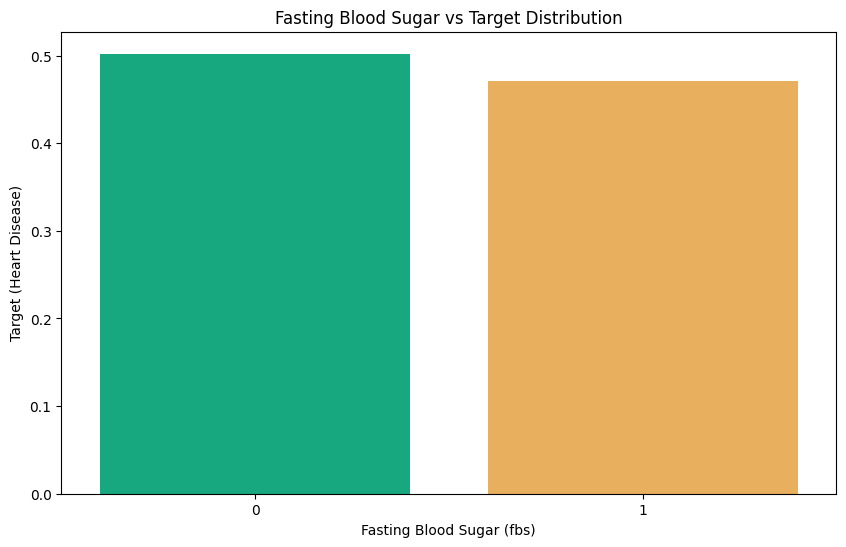

In [89]:
plt.figure(figsize=(10, 6))

# Barplot for fbs (fasting blood sugar) vs target
sns.barplot(x="fbs", y="target", data=merged_df, palette=["#00C08B", "#FFB347"], ci=None)

# Adding labels and title
plt.xlabel('Fasting Blood Sugar (fbs)')
plt.ylabel('Target (Heart Disease)')
plt.title('Fasting Blood Sugar vs Target Distribution')
plt.show()

### Analysing the restecg feature

In [90]:
merged_df["restecg"].unique()

array([2, 0, 1])

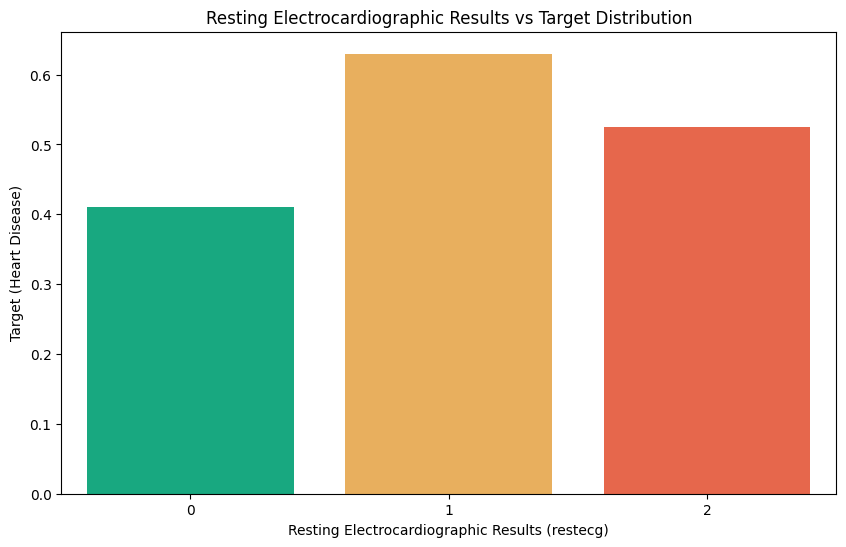

In [91]:
plt.figure(figsize=(10, 6))

# Define a color palette with 3 distinct colors (assuming restecg has 3 unique values)
color_palette = ["#00C08B", "#FFB347", "#FF5733"]

# Barplot for restecg vs target using the defined color palette
sns.barplot(x="restecg", y="target", data=merged_df, palette=color_palette, ci=None)

# Adding labels and title
plt.xlabel('Resting Electrocardiographic Results (restecg)')
plt.ylabel('Target (Heart Disease)')
plt.title('Resting Electrocardiographic Results vs Target Distribution')
plt.show()

In [92]:
# Check the distribution of the target variable (heart disease vs no heart disease)
target_distribution = merged_df['target'].value_counts(normalize=True) * 100  # normalized to get percentage
print(target_distribution)


target
0    50.26178
1    49.73822
Name: proportion, dtype: float64


### Analysing the 'exang' feature

In [93]:
merged_df["exang"].unique()

array([0, 1])

Text(0.5, 1.0, 'Exercise Induced Angina vs Target Distribution')

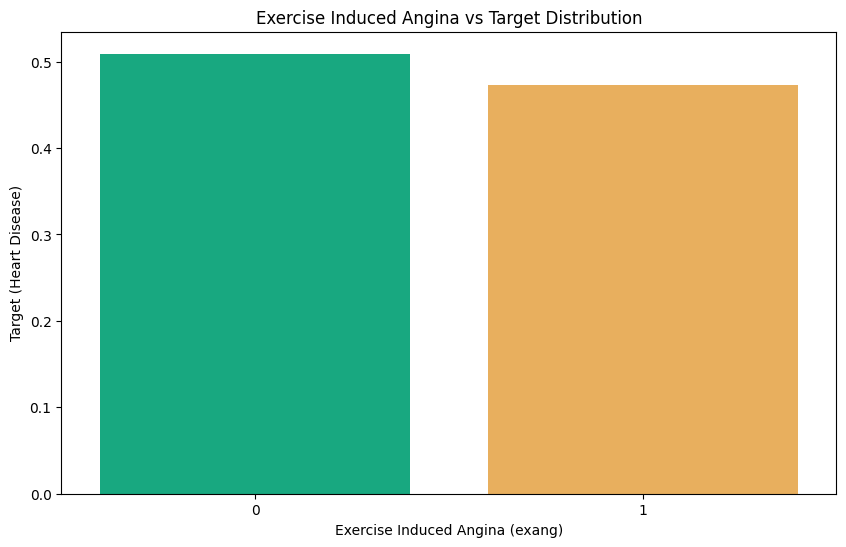

In [94]:
plt.figure(figsize=(10, 6))

# Define a color palette with 2 distinct colors
color_palette = ["#00C08B", "#FFB347"]

# Barplot for exang vs target using the defined color palette
sns.barplot(x="exang", y="target", data=merged_df, palette=color_palette, ci=None)

# Adding labels and title
plt.xlabel('Exercise Induced Angina (exang)')
plt.ylabel('Target (Heart Disease)')
plt.title('Exercise Induced Angina vs Target Distribution')

In [95]:
# Calculate the percentage of heart disease (target == 1) for each category of 'exang'
exang_percentage = merged_df.groupby('exang')['target'].mean() * 100

# Print the percentages
print("Percentage of Heart Disease by Exercise Induced Angina (exang):")
print(exang_percentage)


Percentage of Heart Disease by Exercise Induced Angina (exang):
exang
0    50.909091
1    47.340426
Name: target, dtype: float64


### Analysing the Slope feature

In [96]:
merged_df["slope"].unique()

array([2, 1, 3, 0])

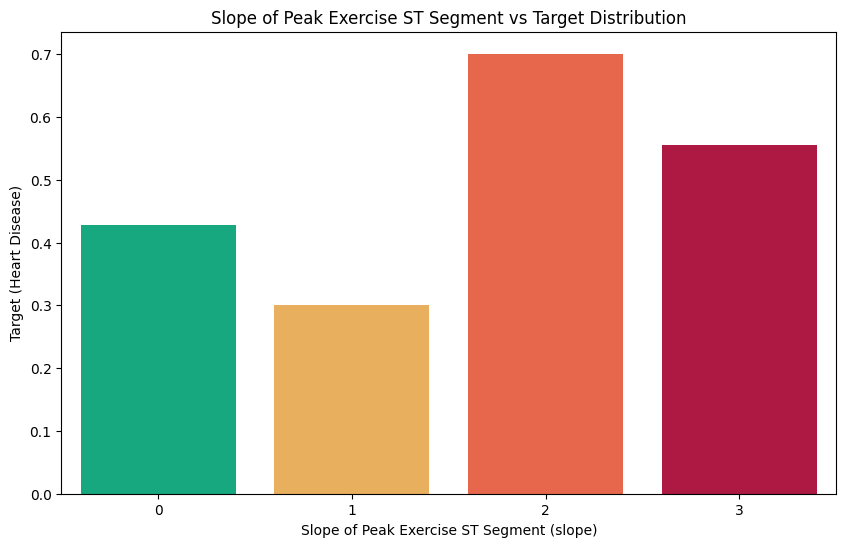

In [97]:
plt.figure(figsize=(10, 6))

# Get unique values in 'slope' to define color palette
unique_values = merged_df["slope"].unique()
num_unique_values = len(unique_values)

# Barplot for slope vs target using the defined color palette
sns.barplot(x="slope", y="target", data=merged_df, palette=["#00C08B", "#FFB347", "#FF5733", "#C70039", "#FFC300"], ci=None)

# Adding labels and title
plt.xlabel('Slope of Peak Exercise ST Segment (slope)')
plt.ylabel('Target (Heart Disease)')
plt.title('Slope of Peak Exercise ST Segment vs Target Distribution')
plt.show()

In [98]:
# Calculate the percentage of heart disease (target == 1) for each category of 'slope'
slope_percentage = merged_df.groupby('slope')['target'].mean() * 100

# Print the percentages
print("Percentage of Heart Disease by Slope of Peak Exercise ST Segment (slope):")
print(slope_percentage)


Percentage of Heart Disease by Slope of Peak Exercise ST Segment (slope):
slope
0    42.857143
1    30.000000
2    70.075758
3    55.555556
Name: target, dtype: float64


### Analysing the 'ca' feature

In [99]:
merged_df["ca"].unique()

array([3, 0, 1, 2, 4])

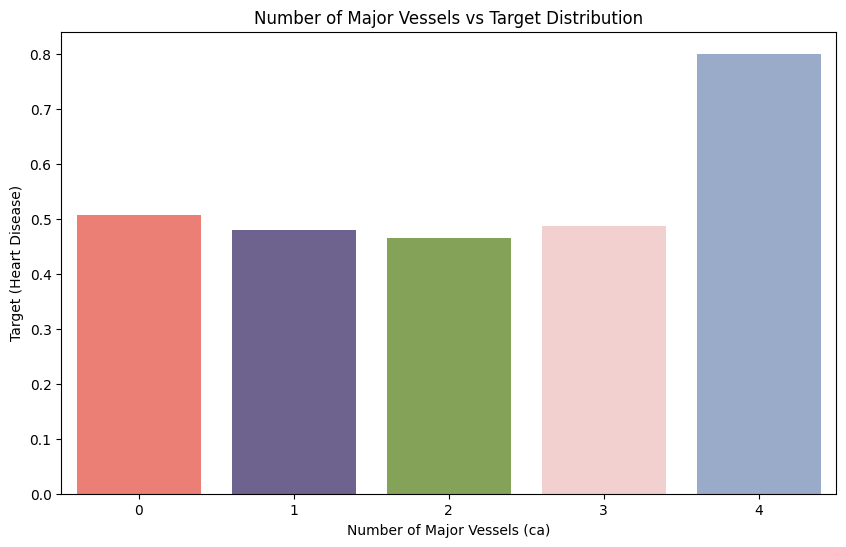

In [100]:
plt.figure(figsize=(10, 6))

# Define a tropical color palette with distinct colors for the unique values in 'ca'
color_palette = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1", "#F7B7A3"]

# Barplot for 'ca' vs target using the defined tropical color palette
sns.barplot(x=merged_df["ca"], y=y, palette=color_palette, ci=None)

# Adding labels and title
plt.xlabel('Number of Major Vessels (ca)')
plt.ylabel('Target (Heart Disease)')
plt.title('Number of Major Vessels vs Target Distribution')
plt.show()

In [101]:
# Calculate the percentage of heart disease (target == 1) for each category of 'ca'
ca_percentage = merged_df.groupby('ca')['target'].mean() * 100

# Print the percentages
print("Percentage of Heart Disease by Number of Major Vessels (ca):")
print(ca_percentage)


Percentage of Heart Disease by Number of Major Vessels (ca):
ca
0    50.746269
1    47.967480
2    46.478873
3    48.717949
4    80.000000
Name: target, dtype: float64


### Analysing the 'thal' feature

In [102]:
merged_df["thal"].unique()

array([3, 7, 6, 1, 2, 0])

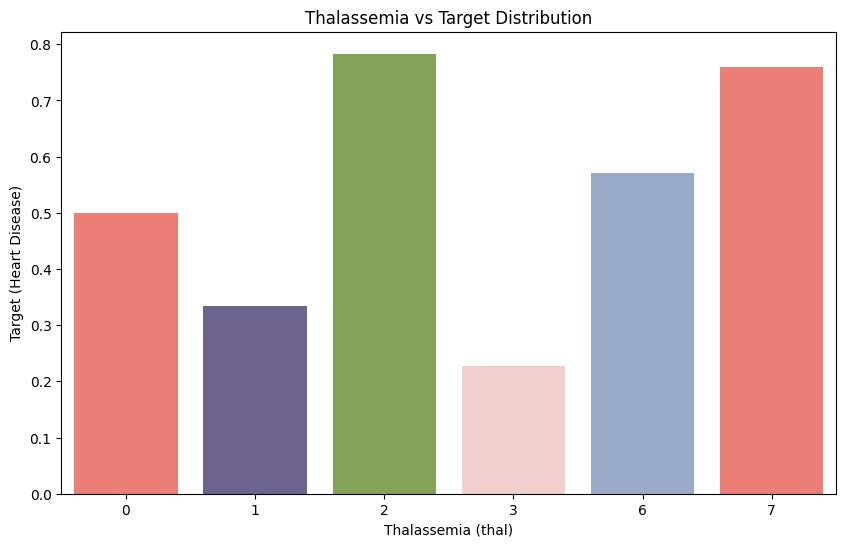

In [103]:
plt.figure(figsize=(10, 6))

# Define a tropical color palette with distinct colors for the unique values in 'thal'
color_palette = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1"]

# Barplot for 'thal' vs target using the defined tropical color palette
sns.barplot(x=merged_df["thal"], y=y, palette=color_palette, ci=None)

# Adding labels and title
plt.xlabel('Thalassemia (thal)')
plt.ylabel('Target (Heart Disease)')
plt.title('Thalassemia vs Target Distribution')
plt.show()

In [104]:
# Calculate the percentage of heart disease (target == 1) for each category of 'thal'
thal_percentage = merged_df.groupby('thal')['target'].mean() * 100

# Print the percentages
print("Percentage of Heart Disease by Thalassemia (thal):")
print(thal_percentage)


Percentage of Heart Disease by Thalassemia (thal):
thal
0    50.000000
1    33.333333
2    78.313253
3    22.676580
6    57.142857
7    75.961538
Name: target, dtype: float64


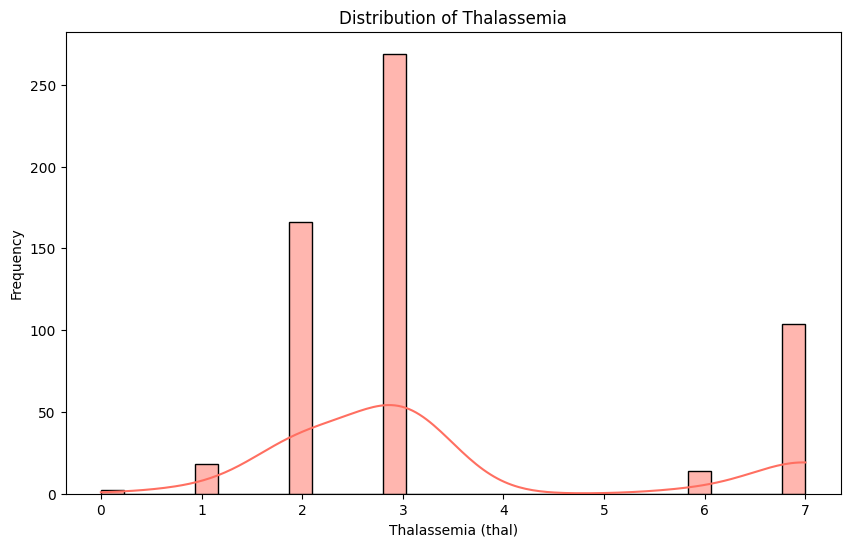

In [105]:
plt.figure(figsize=(10, 6))

# Distribution plot for 'thal' using a tropical color palette
sns.histplot(merged_df["thal"], kde=True, color="#FF6F61")

# Adding labels and title
plt.xlabel('Thalassemia (thal)')
plt.ylabel('Frequency')
plt.title('Distribution of Thalassemia')
plt.show()

#### Heat map

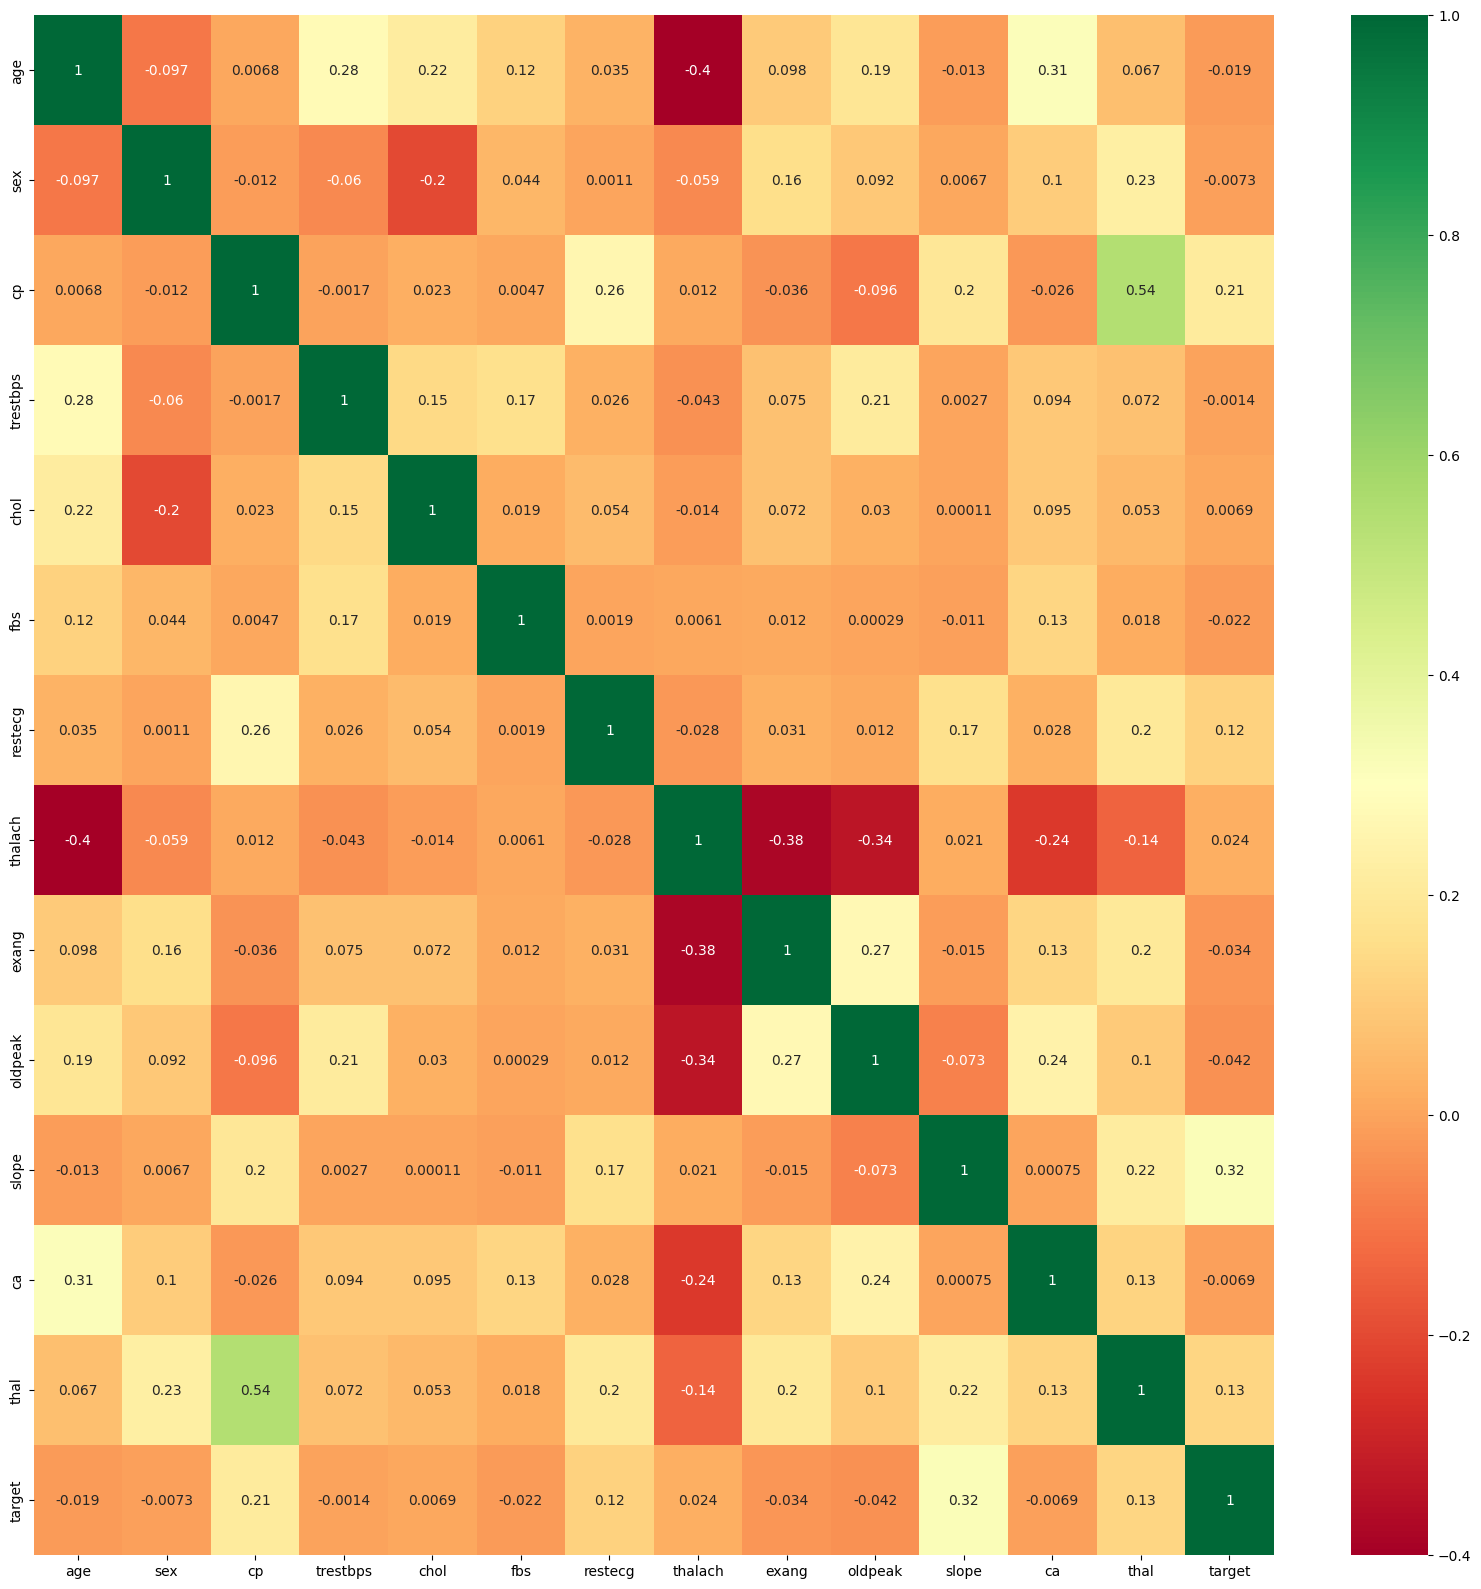

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get correlations of each feature in dataset
corrmat = merged_df.corr()
top_corr_features = corrmat.index

# Create a figure to plot the heatmap
plt.figure(figsize=(20, 20))

# Plot heatmap
sns.heatmap(merged_df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

# Show the plot
plt.show()


#### Pearson Correlation

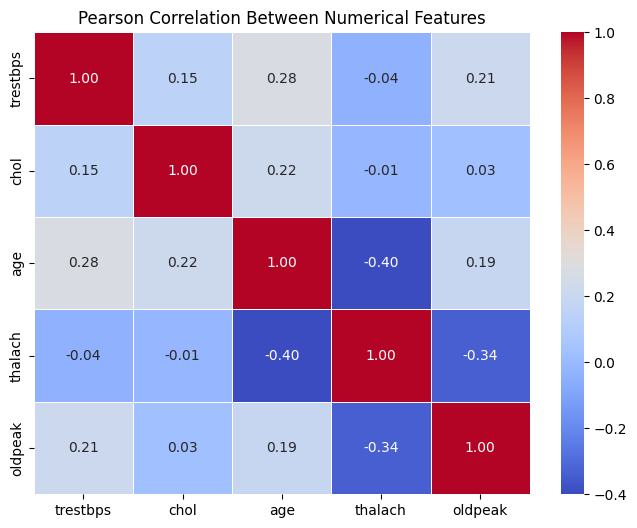

In [108]:

# Extract the numerical features
numerical_features = ['trestbps', 'chol', 'age', 'thalach', 'oldpeak' ]

# Calculate the Pearson correlation matrix for these numerical features
corr_matrix = merged_df[numerical_features].corr(method='pearson')

# Set the figure size for the heatmap
plt.figure(figsize=(8, 6))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add labels and title
plt.title('Pearson Correlation Between Numerical Features')
plt.show()


##  Preprocessing 

### Missing values

In [107]:
# Check for missing values in each column
missing_values = merged_df.isnull().sum()

# Print the number of missing values per column
print("Missing values per column:")
print(missing_values)


Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


#####  no missing values

#### Check for duplicate values

In [134]:
# Check for duplicate rows
duplicates = merged_df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Display duplicate rows, if any
if num_duplicates > 0:
    print("Duplicate rows:")
    print(merged_df[duplicates])
else:
    print("No duplicate rows found.")


Number of duplicate rows: 1
Duplicate rows:
          age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
434 -1.806138    1   2  0.537753 -1.569096    0        1  1.023982      0   

      oldpeak  slope  ca  thal  target  
434 -0.863284      2   4     2       1  


### Outlier Detection

In [109]:
from scipy.stats import zscore
import pandas as pd

# List of numerical features in your dataset
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Calculate Z-scores for each numerical feature
z_scores = zscore(merged_df[numerical_features])

# Find the outliers (Z-score > 3 or < -3)
outliers_zscore = (z_scores > 3) | (z_scores < -3)

# Display rows with outliers based on Z-score
outliers_zscore_df = merged_df[outliers_zscore.any(axis=1)]
print("Outliers based on Z-score:")
print(outliers_zscore_df)

# Optionally, you can remove the outliers
merged_df_no_outliers_zscore = merged_df[~outliers_zscore.any(axis=1)]
print("\nDataframe after removing outliers based on Z-score:")
print(merged_df_no_outliers_zscore.head())


Outliers based on Z-score:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1     67    0   3       115   564    0        2      160      0      1.0   
9     63    0   4       150   407    0        2      154      0      4.0   
52    65    0   3       140   417    1        2      157      0      0.0   
101   67    1   4       120   237    0        0       71      0      1.0   
117   56    0   4       200   288    1        2      133      1      4.0   
144   54    1   2       192   283    0        2      195      0      0.0   
156   55    1   4       140   217    0        0      111      1      5.0   
181   56    0   4       134   409    0        2      150      1      1.0   
235   62    0   4       160   164    0        2      145      0      6.0   
298   65    0   2       140   417    1        0      157      0      0.8   
355   67    0   2       115   564    0        0      160      0      1.6   
474   62    0   0       160   164    0        0      145     

### Replacing outliers

In [110]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Assuming 'merged_df' is your dataframe

# List of numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Calculate Z-scores for the numerical features
z_scores = np.abs(zscore(merged_df[numerical_features]))

# Define threshold for Z-score to identify outliers
threshold = 3

# Identify the outliers
outliers_zscore = z_scores > threshold

# Print out the rows with outliers
outlier_rows = merged_df[outliers_zscore.any(axis=1)]
print("Rows with outliers based on Z-score:")
print(outlier_rows)

# Replace outliers with the median of the respective column
for column in numerical_features:
    median_value = merged_df[column].median()  # Calculate the median of the column
    # Replace outliers with median value
    merged_df[column] = merged_df[column].where(~outliers_zscore[column], median_value)

# Display the dataframe after replacing outliers
print("Dataframe after replacing outliers with median:")
print(merged_df.head())


Rows with outliers based on Z-score:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1     67    0   3       115   564    0        2      160      0      1.0   
9     63    0   4       150   407    0        2      154      0      4.0   
52    65    0   3       140   417    1        2      157      0      0.0   
101   67    1   4       120   237    0        0       71      0      1.0   
117   56    0   4       200   288    1        2      133      1      4.0   
144   54    1   2       192   283    0        2      195      0      0.0   
156   55    1   4       140   217    0        0      111      1      5.0   
181   56    0   4       134   409    0        2      150      1      1.0   
235   62    0   4       160   164    0        2      145      0      6.0   
298   65    0   2       140   417    1        0      157      0      0.8   
355   67    0   2       115   564    0        0      160      0      1.6   
474   62    0   0       160   164    0        0    

In [111]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numerical feature
Q1 = merged_df[numerical_features].quantile(0.25)
Q3 = merged_df[numerical_features].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define outliers as those outside 1.5*IQR from Q1 and Q3
outliers_iqr = (merged_df[numerical_features] < (Q1 - 1.5 * IQR)) | (merged_df[numerical_features] > (Q3 + 1.5 * IQR))

# Display rows with outliers based on IQR
outliers_iqr_df = merged_df[outliers_iqr.any(axis=1)]
print("Outliers based on IQR:")
print(outliers_iqr_df)

# Optionally, you can remove the outliers
merged_df_no_outliers_iqr = merged_df[~outliers_iqr.any(axis=1)]
print("\nDataframe after removing outliers based on IQR:")
print(merged_df_no_outliers_iqr.head())

Outliers based on IQR:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
9     63    0   4       150   243    0        2      154      0      4.0   
58    59    0   4       174   249    0        0      143      1      0.0   
87    59    1   1       178   270    0        2      145      0      4.0   
110   55    0   4       180   327    0        1      117      1      3.0   
117   56    0   4       130   288    1        2      133      1      4.0   
159   66    0   4       178   228    1        0      165      1      1.0   
165   64    0   4       180   325    0        0      154      1      0.0   
176   51    1   4       140   298    0        0      122      1      4.0   
188   62    0   4       140   394    0        2      157      0      1.0   
240   68    1   3       180   274    1        2      150      1      1.0   
265   52    1   3       172   199    1        0      162      0      0.0   
271   37    1   2       130   250    0        1      187      0  

In [112]:
import pandas as pd

# Assuming 'merged_df' is your dataframe

# List of numerical features to check for outliers
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numerical column
Q1 = merged_df[numerical_features].quantile(0.25)
Q3 = merged_df[numerical_features].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = ((merged_df[numerical_features] < lower_bound) | (merged_df[numerical_features] > upper_bound))

# Print out the rows with outliers based on IQR
outlier_rows = merged_df[outliers_iqr.any(axis=1)]
print("Rows with outliers based on IQR:")
print(outlier_rows)

# Replace outliers with the median of the respective column
for column in numerical_features:
    median_value = merged_df[column].median()  # Calculate the median of the column
    # Replace outliers with median value
    merged_df[column] = merged_df[column].where(~outliers_iqr[column], median_value)

# Display the dataframe after replacing outliers
print("Dataframe after replacing outliers with median:")
print(merged_df.head())


Rows with outliers based on IQR:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
9     63    0   4       150   243    0        2      154      0      4.0   
58    59    0   4       174   249    0        0      143      1      0.0   
87    59    1   1       178   270    0        2      145      0      4.0   
110   55    0   4       180   327    0        1      117      1      3.0   
117   56    0   4       130   288    1        2      133      1      4.0   
159   66    0   4       178   228    1        0      165      1      1.0   
165   64    0   4       180   325    0        0      154      1      0.0   
176   51    1   4       140   298    0        0      122      1      4.0   
188   62    0   4       140   394    0        2      157      0      1.0   
240   68    1   3       180   274    1        2      150      1      1.0   
265   52    1   3       172   199    1        0      162      0      0.0   
271   37    1   2       130   250    0        1      18

### Feature Selection

In [113]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Assuming you have a dataframe df, where 'target' is the column to predict
X = merged_df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']]  # Categorical features
y = merged_df['target']  # Target variable

# Ensure that all features are integer type for chi2 test (if not, convert them)
X = X.astype(int)

# Apply Chi-Square test to select best features
chi2_selector = SelectKBest(score_func=chi2, k='all')  # You can adjust 'k' to select a specific number of features
X_kbest = chi2_selector.fit_transform(X, y)

# Get Chi-Square scores and p-values
p_values = chi2_selector.pvalues_
scores = chi2_selector.scores_

# Create a DataFrame to display features and their corresponding Chi-Square scores and p-values
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi-Square Score': scores,
    'P-Value': p_values
})

# Sort by P-Value to find the most significant features
feature_scores.sort_values(by='P-Value', ascending=True, inplace=True)

# Display the results
print(feature_scores)


   Feature  Chi-Square Score       P-Value
1       cp         27.558543  1.524107e-07
5    slope         15.377487  8.803092e-05
7     thal         10.141571  1.449626e-03
3  restecg          7.265669  7.028508e-03
4    exang          0.432368  5.108293e-01
2      fbs          0.244098  6.212617e-01
6       ca          0.037745  8.459551e-01
0      sex          0.009832  9.210157e-01


##### 
The reason for removing the sex feature is that its p-value from the Chi-Square test is the highest (0.921 or 92.1%), indicating that it has the least statistically significant relationship with the target variable (heart disease occurrence) among the features tested.



In [114]:
# # Drop the 'sex' feature from the dataframe
# merged_df = merged_df.drop(columns=['sex','ca'])

# # Display the updated dataframe to verify the change
# merged_df.head()


#### One Hot encoding

In [115]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns (these could include 'ca', 'cp', 'fbs', etc.)
categorical_columns = ['cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    merged_df[col] = label_encoder.fit_transform(merged_df[col])

# Display the updated dataframe to verify Label Encoding
print(merged_df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   70    1   4       130   322    0        2      109      0      2.0      2   
1   67    0   3       115   243    0        2      160      0      1.0      2   
2   57    1   2       124   261    0        0      141      0      0.0      1   
3   64    1   4       128   263    0        0      105      1      0.0      2   
4   74    0   2       120   269    0        2      121      1      0.0      1   

   ca  thal  target  
0   3     3       1  
1   0     5       0  
2   0     5       1  
3   1     5       0  
4   1     3       0  


### Scaling numerical values

In [116]:
# Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# List of numerical features to scale
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features to scale them
merged_df[numerical_features] = scaler.fit_transform(merged_df[numerical_features])

# Display the scaled dataframe to verify the changes
print(merged_df.head())

        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  1.718483    1   4  0.008429  1.751754    0        2 -1.818889      0   
1  1.388050    0   3 -0.984052 -0.032920    0        2  0.446524      0   
2  0.286606    1   2 -0.388563  0.373714    0        0 -0.397453      0   
3  1.057617    1   4 -0.123901  0.418896    0        0 -1.996568      1   
4  2.159061    0   2 -0.653225  0.554441    0        2 -1.285850      1   

    oldpeak  slope  ca  thal  target  
0  1.341582      2   3     3       1  
1  0.239149      2   0     5       0  
2 -0.863284      1   0     5       1  
3 -0.863284      2   1     5       0  
4 -0.863284      1   1     3       0  


#### Cross-validation

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are already defined as your features and target
model = RandomForestClassifier(n_estimators=100, random_state=0)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=10)

# Display cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean() * 100:.2f}%")


Cross-validation scores: [0.75862069 0.79310345 0.89655172 0.75438596 0.84210526 0.84210526
 0.87719298 0.8245614  0.85964912 0.75438596]
Average cross-validation score: 82.03%


In [118]:
# Dependent feature (target variable)
X = merged_df.drop('target', axis=1)  # axis=1 refers to columns, dropping the 'target' column

# Independent feature (target variable)
y = merged_df['target']  # Selecting the 'target' column as the dependent feature

# Display the shapes to verify
print("Independent Features (X) shape:", X.shape)
print("Dependent Feature (y) shape:", y.shape)

Independent Features (X) shape: (573, 13)
Dependent Feature (y) shape: (573,)


## Train Test split

In [119]:
from sklearn.model_selection import train_test_split

predictors = merged_df.drop("target",axis=1)
target = merged_df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [120]:
X_train.shape

(458, 13)

In [121]:
X_test.shape

(115, 13)

In [122]:
Y_train.shape

(458,)

In [123]:
Y_test.shape

(115,)

## Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression()

# Train the model with the training data
log_reg_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = log_reg_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
accuracy_percentage = accuracy * 100

# Display the results
print("Accuracy: {:.2f}%".format(accuracy_percentage))

Accuracy: 0.6173913043478261
Confusion Matrix:
 [[36 25]
 [19 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.59      0.62        61
           1       0.58      0.65      0.61        54

    accuracy                           0.62       115
   macro avg       0.62      0.62      0.62       115
weighted avg       0.62      0.62      0.62       115

Accuracy: 61.74%


## Decision Tree

In [126]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=0)

# Train the model with the training data
dt_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_dt = dt_model.predict(X_test)

# Evaluate the model performance
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)

# Display the accuracy as a percentage
accuracy_percentage_dt = accuracy_dt * 100

# Display the results
print("Decision Tree Accuracy: {:.2f}%".format(accuracy_percentage_dt))


Decision Tree Accuracy: 73.91%


## KNN

In [127]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN model with the number of neighbors (k)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model with the training data
knn_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_knn = knn_model.predict(X_test)

# Evaluate the model performance
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)

# Display the accuracy as a percentage
accuracy_percentage_knn = accuracy_knn * 100

# Display the results
print("KNN Accuracy: {:.2f}%".format(accuracy_percentage_knn))


KNN Accuracy: 80.00%


## SVM

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM model
svm_model = SVC()

# Train the model with the training data
svm_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_svm = svm_model.predict(X_test)

# Evaluate the model performance
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)

# Display the accuracy as a percentage
accuracy_percentage_svm = accuracy_svm * 100

# Display the results
print("SVM Accuracy: {:.2f}%".format(accuracy_percentage_svm))


SVM Accuracy: 82.61%


## XGBoost

In [137]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier()

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, Y_train)
print(f"Best parameters: {grid_search_xgb.best_params_}")
print(f"Best accuracy: {grid_search_xgb.best_score_}")
accuracy_percentage_xgb = grid_search_xgb.best_score_ * 100

# Display the results
print("XGBoost Accuracy: {:.2f}%".format(accuracy_percentage_xgb))


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best accuracy: 0.7903248924988054
XGBoost Accuracy: 79.03%


## Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

max_accuracy = 0

# Loop to find the best random state
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    
    # Fit the model using the scaled training data
    rf.fit(X_train, Y_train)
    
    # Predict on the scaled test data
    Y_pred_rf = rf.predict(X_test)
    
    # Calculate the accuracy
    current_accuracy = round(accuracy_score(Y_pred_rf, Y_test) * 100, 2)
    
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

# Train with the best random state found in the loop
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)

# Calculate the final accuracy
score_rf = round(accuracy_score(Y_pred_rf, Y_test) * 100, 2)
print("The accuracy score achieved using Random Forest is: " + str(score_rf) + " %")


The accuracy score achieved using Random Forest is: 87.83 %


## Output final score

In [141]:
scores = [accuracy_percentage,accuracy_percentage_dt,accuracy_percentage_knn,accuracy_percentage_svm,accuracy_percentage_xgb,score_rf]
algorithms = ["Logistic Regression","Decision Tree","K-Nearest Neighbors","SVM","XGBoost","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 61.73913043478261 %
The accuracy score achieved using Decision Tree is: 73.91304347826086 %
The accuracy score achieved using K-Nearest Neighbors is: 80.0 %
The accuracy score achieved using SVM is: 82.6086956521739 %
The accuracy score achieved using XGBoost is: 79.03248924988054 %
The accuracy score achieved using Random Forest is: 87.83 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

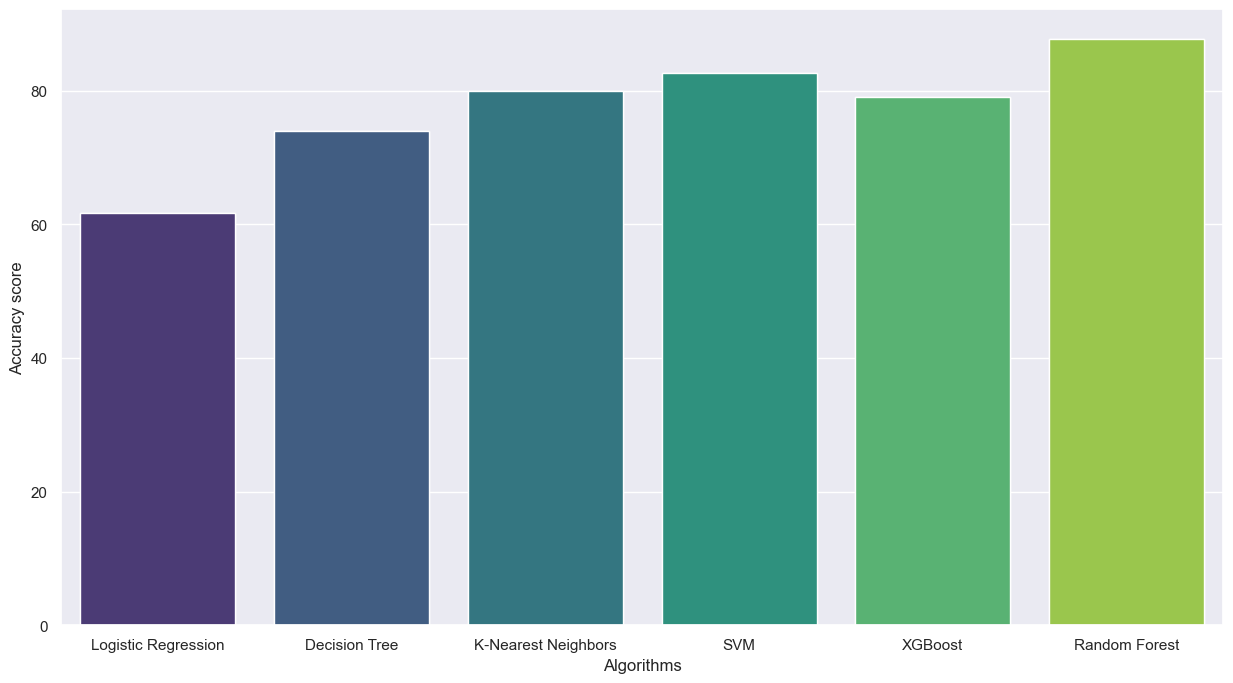

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=scores)
sns.barplot(x=algorithms, y=scores, palette="viridis")